# Supervised Learning: The most probable manner of death
## Source: WikiData

In [15]:
import pandas as pd
import numpy as np
import visuals as vs
import seaborn as sb
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

### Import CSV from WikiData

In [2]:
data = pd.read_csv('news360.csv')

In [3]:
print data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6105 entries, 0 to 6104
Data columns (total 7 columns):
person            6105 non-null object
gender_Label      6105 non-null object
death_Label       6105 non-null object
job_Label         6105 non-null object
religion_Label    6105 non-null object
country_Label     6105 non-null object
language_Label    6105 non-null object
dtypes: object(7)
memory usage: 333.9+ KB
None


In [6]:
print "The total number of data points is: {}".format(data.shape[0])

The total number of data points is: 6105


### See the features and split the label

In [7]:
data_raw = data.drop('person', axis=1)
features_raw = data_raw.drop('death_Label', axis=1)
label_raw = data['death_Label']
features_raw.head()

,gender_Label,job_Label,religion_Label,country_Label,language_Label
0,male,student,Catholic Church,Switzerland,French
1,male,lawyer,Islam,Pakistan,English
2,male,lawyer,Shia Islam,Pakistan,English
3,male,politician,Islam,Pakistan,English
4,male,politician,Shia Islam,Pakistan,English


### Data exploration
Here I set up tables to view the frequency of the each labels in manner of death.

In [238]:
x = label_raw.value_counts()
df = pd.DataFrame(x)
df

,death_Label
natural causes,4353
homicide,657
suicide,251
accident,219
capital punishment,190
attack,70
unnatural death,56
heart failure,42
falling,32
myocardial infarction,24


In [222]:
label_raw.shape

(6105,)

In [313]:
label_index=[]
y=[]
for i,r in df.iterrows():
    label_index.append(i)
    y.append(r['death_Label'])

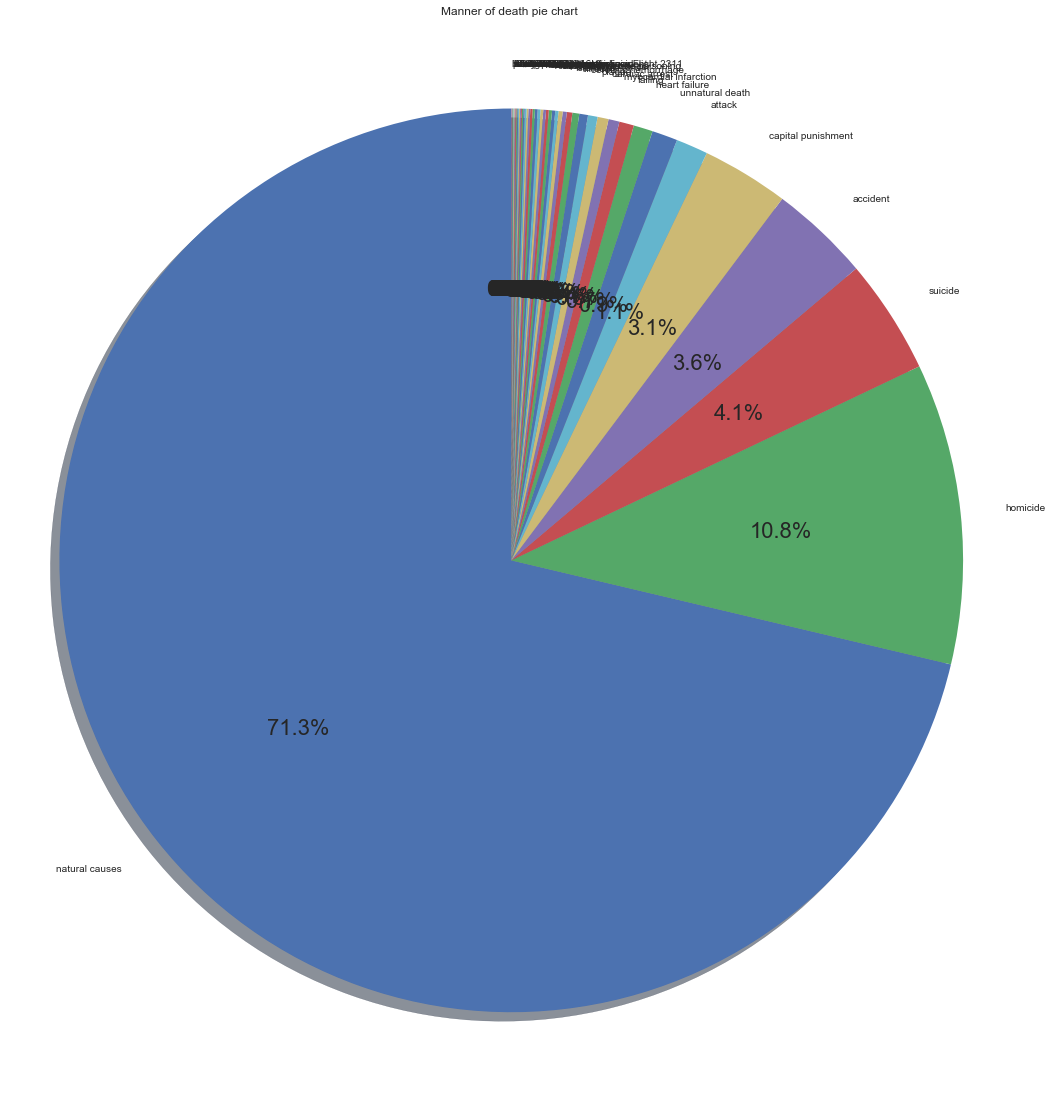

In [314]:
plt.rcParams['figure.figsize'] = (18,20)
plt.rcParams.update({'font.size':22})
# fig, ax = plt.subplots()
plt.pie(y, labels=label_index, shadow=True, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Manner of death pie chart")

### Visualization of distribution for manner of death

In [316]:
religion = data_raw['religion_Label']
sex = data_raw['gender_Label']
my_tab = pd.crosstab(label_raw, columns='Count')

col_0                                    Count
death_Label                                   
Atentado                                     6
Atlantic Southeast Airlines Flight 2311      1
Cerebral hypoxia                             9
European wars of religion                    2
French Revolution                            2
Islamism                                    12
Pancreatic cancer                            9
Q10264768                                    2
Q28860788                                    4
Q9072523                                     2
Whitechapel murders                          1
accident                                   219
assassination                                6
attack                                      70
aviation accident or incident                2
ballistic trauma                             5
battle                                       1
brain tumor                                  1
capital punishment                         190
car bomb     

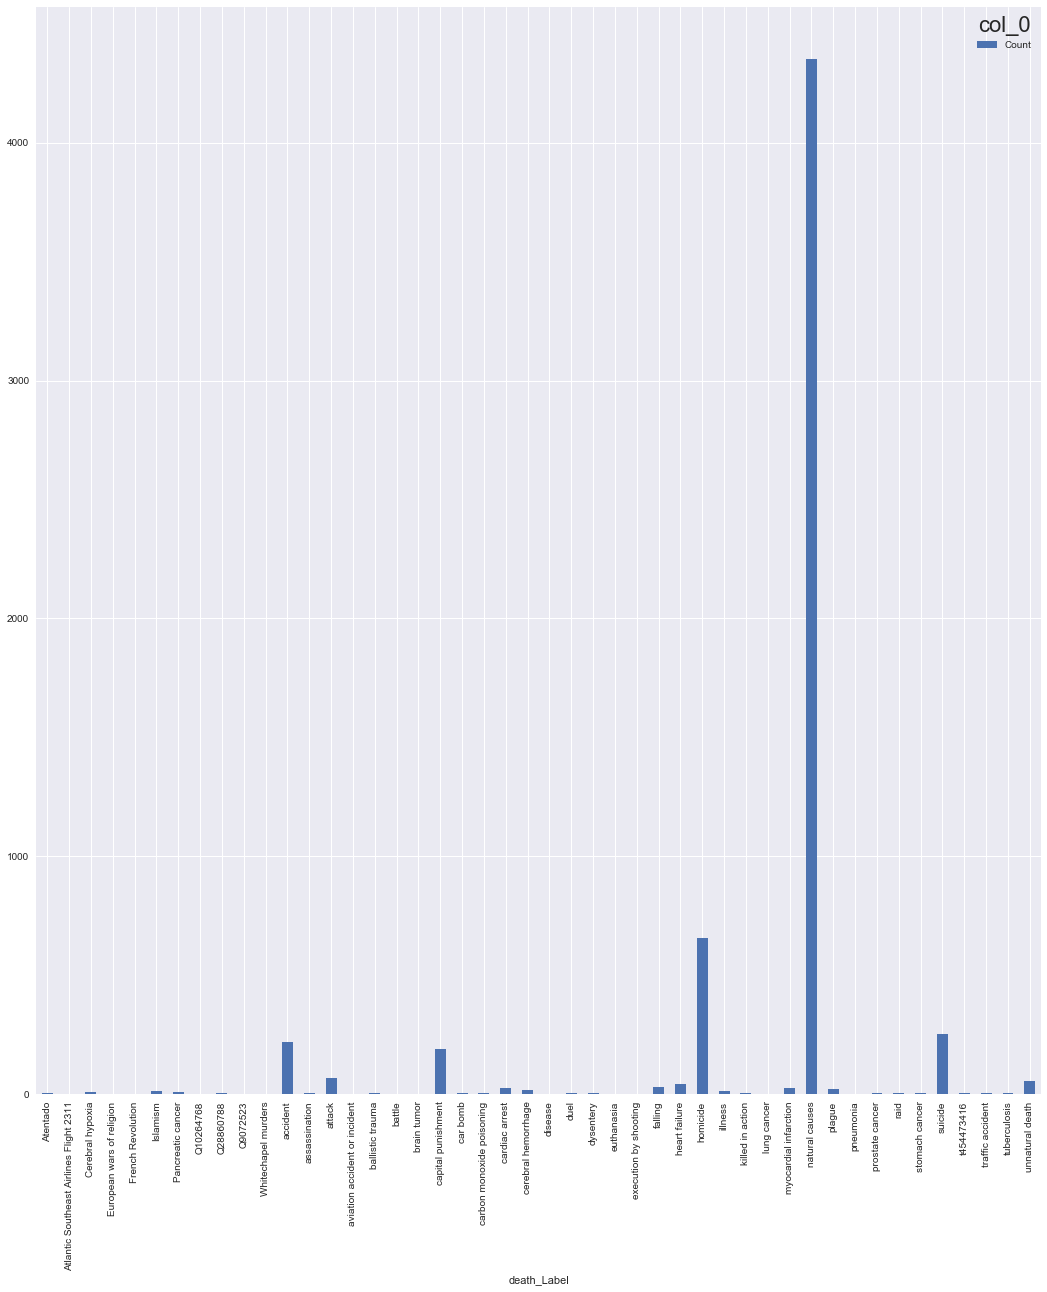

In [315]:
print my_tab
my_tab.plot.bar()

In [89]:
grouped = data_raw.groupby(['death_Label', 'gender_Label'])
grouped = grouped.size()
grouped

death_Label                              gender_Label
Atentado                                 male               6
Atlantic Southeast Airlines Flight 2311  male               1
Cerebral hypoxia                         female             9
European wars of religion                male               2
French Revolution                        male               2
Islamism                                 male              12
Pancreatic cancer                        male               9
Q10264768                                male               2
Q28860788                                female             4
Q9072523                                 male               2
Whitechapel murders                      female             1
accident                                 female            37
                                         male             182
assassination                            male               6
attack                                   male              70
aviation acciden

In [90]:
table = pd.crosstab(index=data_raw['death_Label'], columns=data_raw['gender_Label'])

In [91]:
print type(table), type(grouped)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


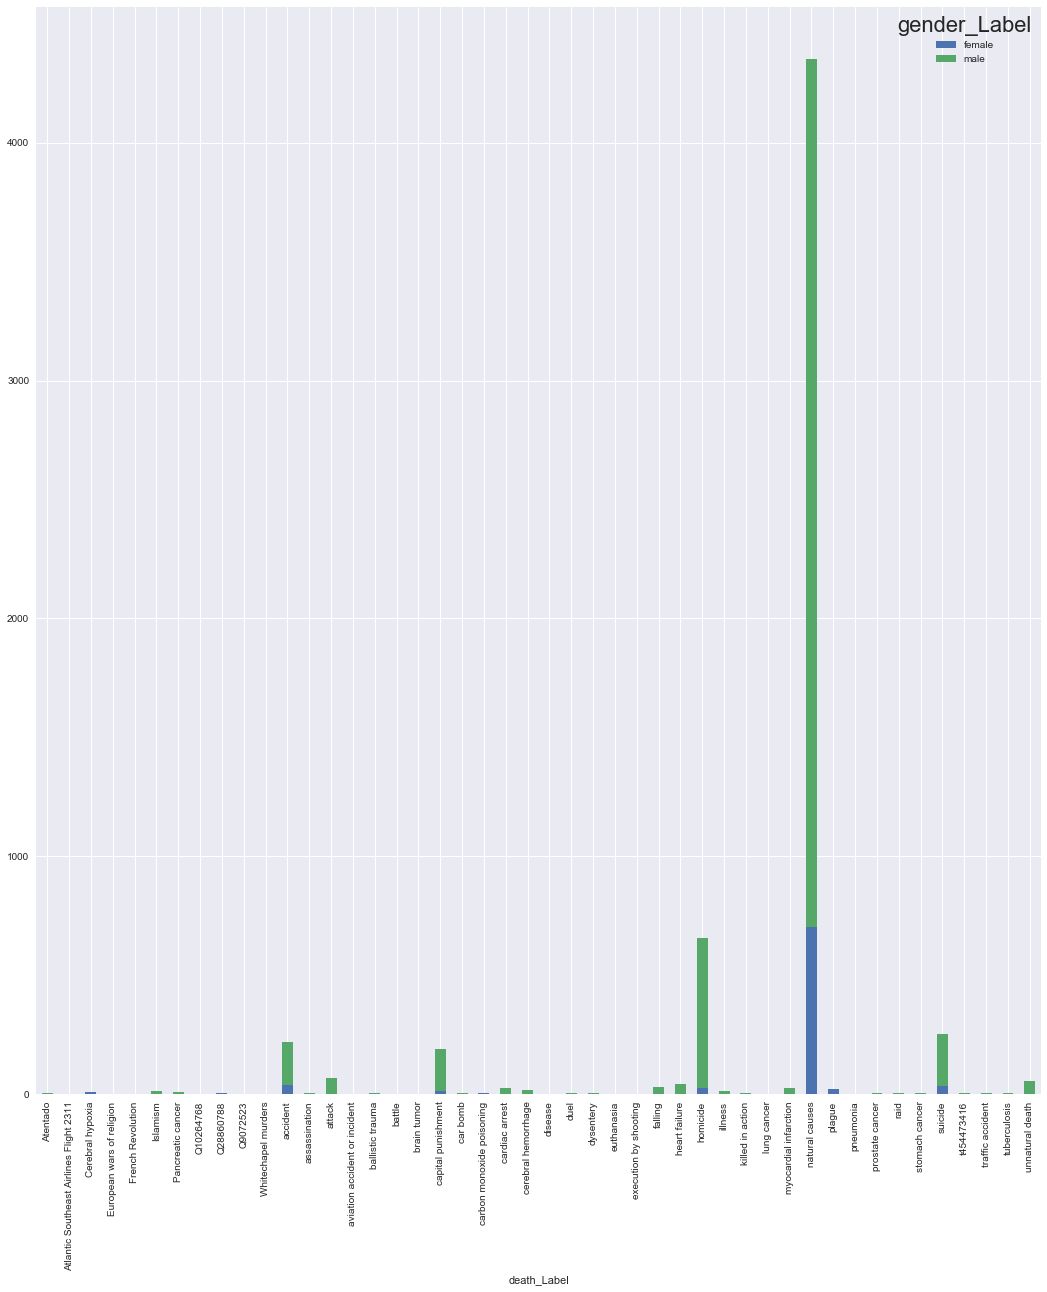

In [317]:
table.plot(kind='bar', stacked=True)

### Naive Predictor: make a guess about the most probable manner of death
Here I guessed that natural cause is the most probable manner of death and I wanted to see how accurate my guess is. I used one-hot-encoding to quantify categorical labels and features.

In [93]:
features = pd.get_dummies(features_raw, columns=['gender_Label','country_Label','language_Label', 'job_Label', 'religion_Label'])
label = pd.get_dummies(label_raw)
natural_causes = label['natural causes']

In [223]:
print features.shape, label.shape

(6105, 800) (6105, 46)


In [94]:
print "The size of encoded labels is {}\nThe size of encoded features is {}".format(label.shape[1], features.shape[1])

The size of encoded labels is 46
The size of encoded features is 800


In [95]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=.2, random_state=5)
print 'Training set has {} samples.\nTesting set has {} samples.'.format((X_train.shape[0]), X_test.shape[0])

Training set has 4884 samples.
Testing set has 1221 samples.


In [96]:
y_pred_naive = []
for i in range(len(data)):
    y_pred_naive.append(1)

In [97]:
from sklearn.metrics import accuracy_score, fbeta_score
print "The accuracy of naive predictor is {}".format(accuracy_score(natural_causes, y_pred_naive))
print "The fbeta_score of naive predictor is {}".format(fbeta_score(natural_causes, y_pred_naive, beta=0.5))

The accuracy of naive predictor is 0.713022113022
The fbeta_score of naive predictor is 0.756438327599


### Initial Model Evaluation

DecisionTreeClassifier

GaussianNB

SVC

RandomForestClassifier

AdaBoostClassifier

KNeighoborsClassifier

In [98]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print 'The accuracy for Decision Tree is {}.\nThe fbeta_score for Decision Tree is {}.'.format(accuracy_score(y_test, y_pred_tree),fbeta_score(y_test, y_pred_tree, beta=0.5, average='micro'))

The accuracy for Decision Tree is 0.760032760033.
The fbeta_score for Decision Tree is 0.7895184618.


In [99]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
y_pred_NB = OneVsRestClassifier(GaussianNB()).fit(X_train, y_train).predict(X_test)
print 'The accuracy for Naive Bayes is {}.\nThe fbeta_score for Naive Bayes is {}.'.format(accuracy_score(y_test, y_pred_NB),fbeta_score(y_test, y_pred_NB, beta=0.5, average='micro'))

The accuracy for Naive Bayes is 0.356265356265.
The fbeta_score for Naive Bayes is 0.303330896941.


In [100]:
from sklearn.svm import SVC
y_pred_svm = OneVsRestClassifier(SVC(kernel='linear', random_state=5)).fit(X_train, y_train).predict(X_test)
print 'The accuracy for SVC is {}.\nThe fbeta_score for SVC is {}.'.format(accuracy_score(y_test, y_pred_svm),fbeta_score(y_test, y_pred_svm, beta=0.5, average='micro'))

The accuracy for SVC is 0.755118755119.
The fbeta_score for SVC is 0.812445980985.


In [101]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(random_state=5)
random.fit(X_train, y_train)
y_pred_random = random.predict(X_test)
print 'The accuracy for Random Forest is {}.\nThe fbeta_score for Random Forest is {}.'.format(accuracy_score(y_test, y_pred_random),fbeta_score(y_test, y_pred_random, beta=0.5, average='micro'))

The accuracy for Random Forest is 0.760851760852.
The fbeta_score for Random Forest is 0.808529155788.


In [102]:
from sklearn.ensemble import AdaBoostClassifier
y_pred_boost = OneVsRestClassifier(AdaBoostClassifier(random_state=5)).fit(X_train, y_train).predict(X_test)
print 'The accuracy for AdaBoost is {}.\nThe fbeta_score for AdaBoost is {}.'.format(accuracy_score(y_test, y_pred_boost),fbeta_score(y_test, y_pred_boost, beta=0.5, average='micro'))

The accuracy for AdaBoost is 0.687960687961.
The fbeta_score for AdaBoost is 0.76143407606.


In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print 'The accuracy for KNN is {}.\nThe fbeta_score for KNN is {}.'.format(accuracy_score(y_test, y_pred_knn),fbeta_score(y_test, y_pred_knn, beta=0.5, average='micro'))

The accuracy for KNN is 0.771498771499.
The fbeta_score for KNN is 0.816432657306.


### Model Optimization: KNN
Here in model optimization, I choose three model that performs well in the initial evaluation:

KNN

DecisionTreeClassifier

RandomForestClassifier


In [321]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from time import time
n_neighbors = range(1,30)
param = dict(n_neighbors=n_neighbors)
knn_opt = KNeighborsClassifier()
grid = GridSearchCV(knn_opt, param, scoring='accuracy', cv=10)
t0 = time()
grid.fit(X_train, y_train)
t1 = time()
print "The traning time is: {}".format(t1-t0)

The traning time is: 974.623534918


In [105]:
best_clf = grid.best_estimator_
results = grid.grid_scores_
print "The best optimized KNN is: \n\n{}".format(best_clf)
print "\nThe best accuracy score is {}".format(grid.best_score_)

The best optimized KNN is: 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

The best accuracy score is 0.767608517609


In [106]:
grid_mean_scores = []
for i in results:
    grid_mean_scores.append(i.mean_validation_score)

ValueError: x and y must have same first dimension, but have shapes (29,) and (342,)

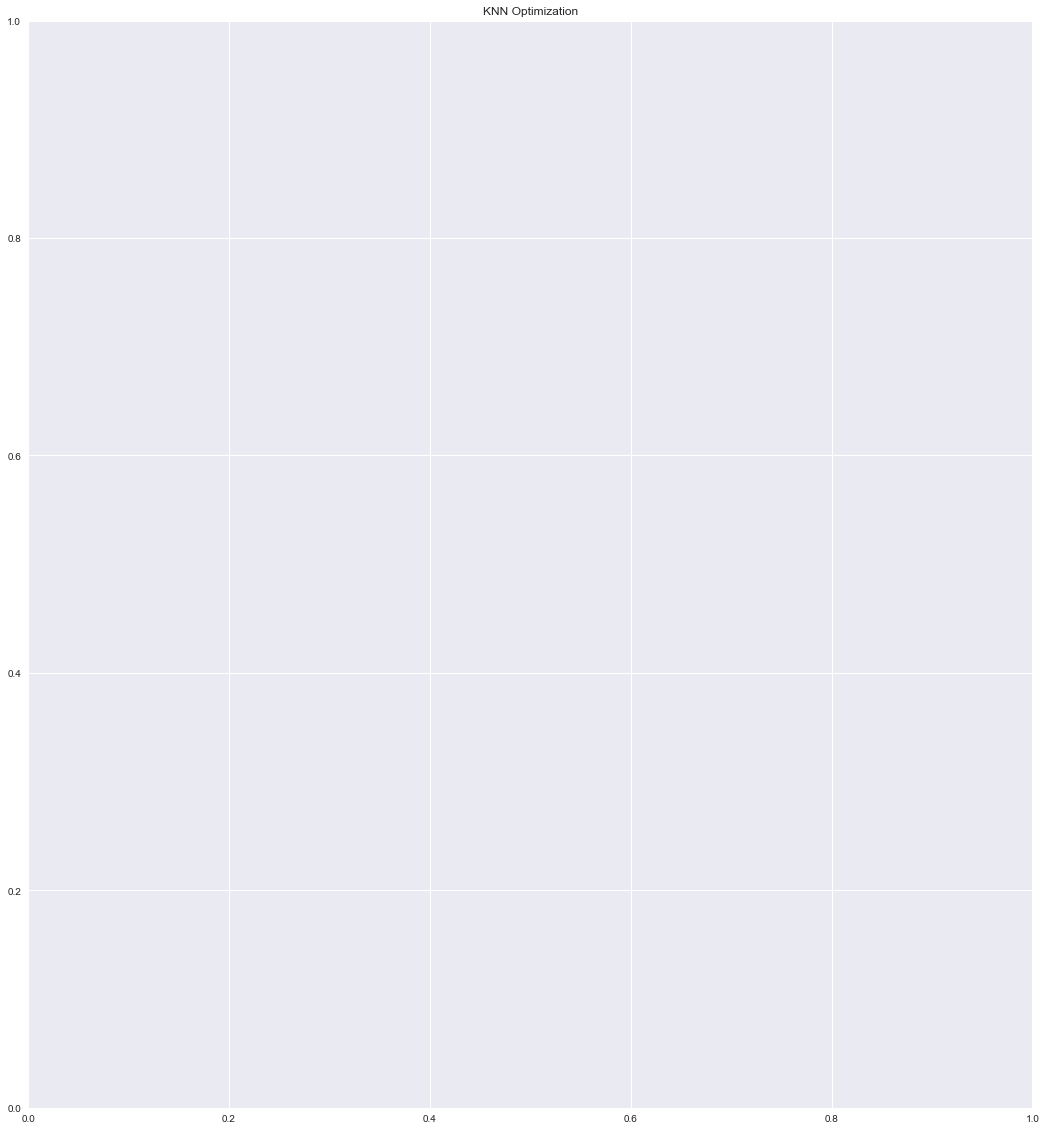

In [318]:
import matplotlib.pyplot as plt
plt.title('KNN Optimization')
plt.plot(n_neighbors, grid_mean_scores)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')

In [108]:
y_pred_knn_opt = best_clf.predict(X_test)
print 'The accuracy for optimized KNN is {}.\nThe fbeta_score for optimized KNN is {}.'.format(accuracy_score(y_test, y_pred_knn_opt),fbeta_score(y_test, y_pred_knn_opt, beta=0.5, average='micro'))

The accuracy for optimized KNN is 0.771498771499.
The fbeta_score for optimized KNN is 0.816432657306.


### Model Optimizaiton : Decision Tree

In [109]:
max_depth = range(1,20)
min_samples_split = range(2,20)
param = dict(max_depth=max_depth, min_samples_split=min_samples_split)
# scorer = make_scorer(fbeta_score, beta=0.5, average='micro')
tree_opt = DecisionTreeClassifier(random_state=5)
grid_tree = GridSearchCV(tree_opt, param, scoring='accuracy', cv=10)
t0 = time()
grid_tree.fit(X_train, y_train)
t1 = time()
print "The traning time is: {}".format(t1-t0)

The traning time is: 609.189697027


In [110]:
best_clf = grid_tree.best_estimator_
results = grid_tree.grid_scores_
print "The best optimized Decision Tree is: \n\n{}".format(best_clf)
print "\nThe best accuracy score is: {}".format(grid_tree.best_score_)

The best optimized Decision Tree is: 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=17,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=5, splitter='best')

The best accuracy score is: 0.758804258804


In [111]:
grid_mean_scores = []
for i in results:
    grid_mean_scores.append(i.mean_validation_score)

In [112]:
count = 1
list_1 = []
list_2 = []
for i in grid_mean_scores:
    list_1.append(i)
    count += 1
#     print count
    if count == 19:
        list_2.append(np.mean(list_1))
        list_1 = []
        count = 1

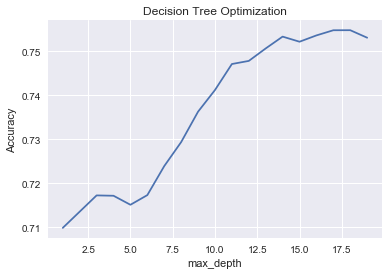

In [113]:
import matplotlib.pyplot as plt
plt.title('Decision Tree Optimization')
plt.plot(max_depth, list_2)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [114]:
y_pred_tree_opt = best_clf.predict(X_test)
print 'The accuracy for optimized Decision Tree is: {}.\nThe fbeta_score for optimized Decision Tree is: {}.'.format(accuracy_score(y_test, y_pred_tree_opt),fbeta_score(y_test, y_pred_tree_opt, beta=0.5, average='micro'))

The accuracy for optimized Decision Tree is: 0.764127764128.
The fbeta_score for optimized Decision Tree is: 0.775303307296.


### Model Optimization: RandomForest

In [115]:
max_depth = range(1,20)
min_samples_split = range(2,20)
param = dict(max_depth=max_depth, min_samples_split=min_samples_split)
random_opt = RandomForestClassifier(random_state=5)
grid_random = GridSearchCV(random_opt, param, scoring='accuracy', cv=10)
t0 = time()
grid_random.fit(X_train, y_train)
t1 = time()
print "The traning time is: {}".format(t1-t0)

The traning time is: 1143.84146094


In [116]:
best_clf = grid_random.best_estimator_
results = grid_random.grid_scores_
print "The best optimized Random Forest is: \n\n{}".format(best_clf)
print "\nThe best accuracy score is: {}".format(grid_random.best_score_)

The best optimized Random Forest is: 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=19, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=5, verbose=0, warm_start=False)

The best accuracy score is: 0.728910728911


In [117]:
list_1 = []
list_2 = []
count = 1
for i in results:
    list_1.append(i[1])
    count += 1
#     print count
    if count == 19:
        list_2.append(np.mean(list_1))
        list_1 = []
        count = 1

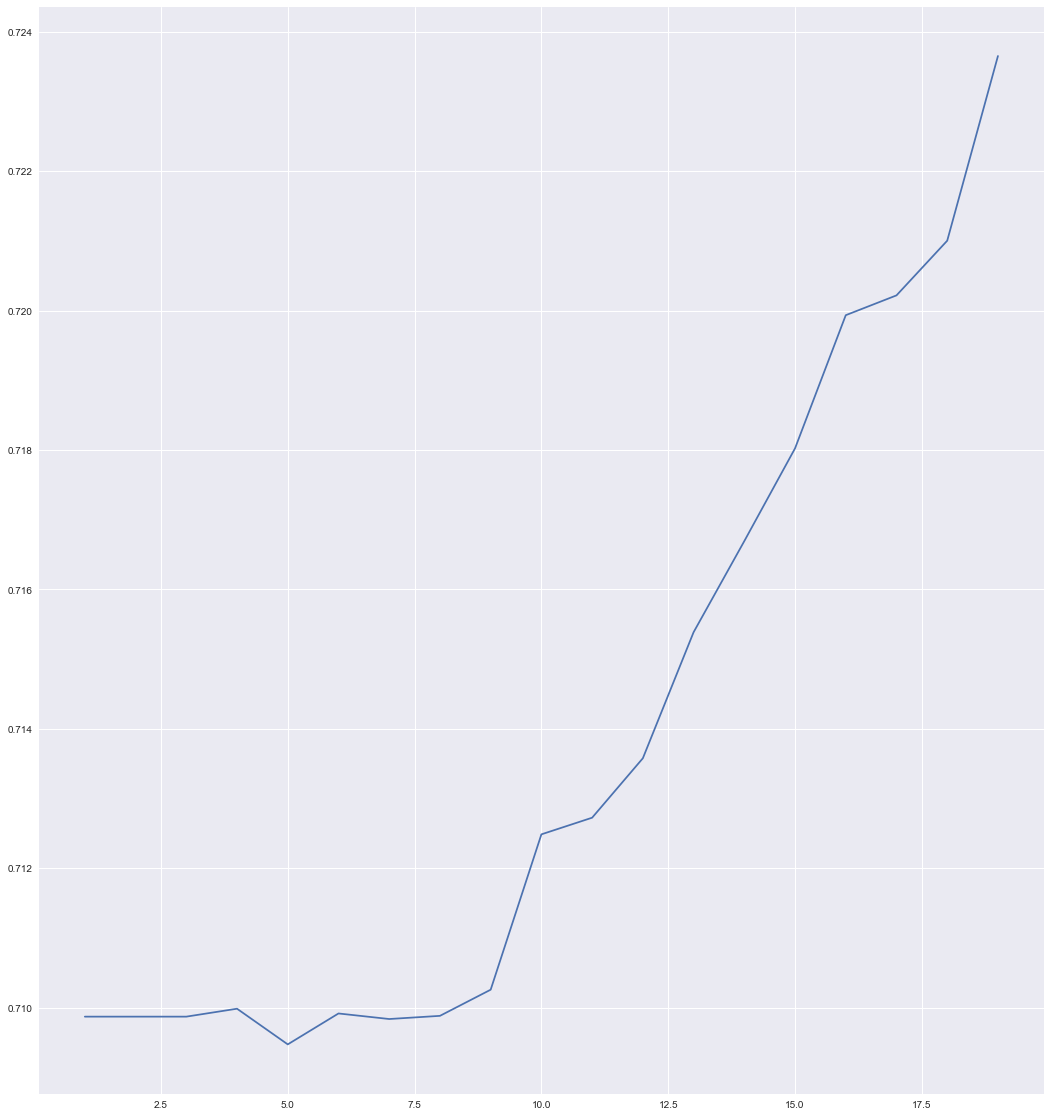

In [320]:
plt.plot(max_depth, list_2)

In [119]:
y_pred_random_opt = best_clf.predict(X_test)
print 'The accuracy for optimized Random Forest is: {}.\nThe fbeta_score for optimized Random Forest is: {}.'.format(accuracy_score(y_test, y_pred_random_opt),fbeta_score(y_test, y_pred_random_opt, beta=0.5, average='micro'))

The accuracy for optimized Random Forest is: 0.740376740377.
The fbeta_score for optimized Random Forest is: 0.765453005927.


### Feature Selection
Based on the optimized model, I choose Decision Tree because it has higher accuracy score (76%) than Random Forest's (74%). Also the Decision Tree has feature_importances_ attribute that KNN does not have, allowing me to reduce features.

The following is what I did to find 5 most important features that Decison Tree thinks is taking large part in the learning patterns.

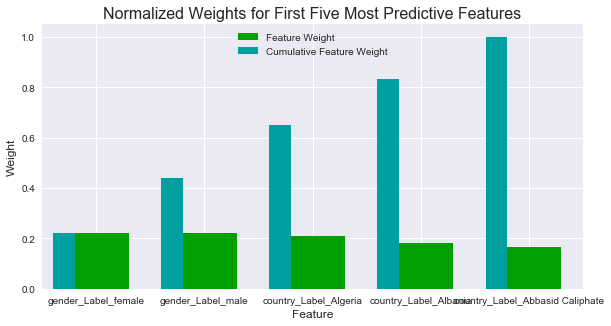

In [319]:
importances = best_clf.feature_importances_
vs.feature_plot(importances, X_train, y_train)

In [121]:
X_train_reduced = X_train[X_train.columns.values[np.argsort(importances)][::-1][:5]]
X_test_reduced = X_test[X_test.columns.values[np.argsort(importances)][::-1][:5]]

In [122]:
best_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=19, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=5, verbose=0, warm_start=False)

In [123]:
t0=time()
y_pred_reduced_tree = best_clf.fit(X_train_reduced, y_train).predict(X_test_reduced)

print "Time to train reduced sets is: {}".format(time()-t0)
print 'The accuracy for optimized Random Forest on reduced features is: {}.\nThe fbeta_score for optimized Random Forest on reduced features is: {}.'.format(accuracy_score(y_test, y_pred_reduced_tree),fbeta_score(y_test, y_pred_reduced_tree, beta=0.5, average='micro'))

Time to train reduced sets is: 0.298952102661
The accuracy for optimized Random Forest on reduced features is: 0.730548730549.
The fbeta_score for optimized Random Forest on reduced features is: 0.742714404663.


### Conclusion: 
The optimized Decison Tree has,on reduced training set, an accuracy of 73% predicting manner of death which is a bit lower than that on full training set, but it has a much faster performance (it takes only 15m seconds versus 680 seconds).

As you can see, the most probable manner of death is natural cause, which says my guess (Naive Predictor) is correct.

In [272]:
y = y_pred_reduced_tree.sum().tolist()
y = pd.DataFrame(y)
print type(y)
y.columns = ['counts']
y

<class 'pandas.core.frame.DataFrame'>


,counts
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [277]:
x = pd.DataFrame(label.columns.values)
x.columns = ['manner of death']
x

,manner of death
0,Atentado
1,Atlantic Southeast Airlines Flight 2311
2,Cerebral hypoxia
3,European wars of religion
4,French Revolution
5,Islamism
6,Pancreatic cancer
7,Q10264768
8,Q28860788
9,Q9072523


In [275]:
z = x.join(y, how='outer')

In [287]:
x = label.columns.values

In [286]:
y = y_pred_reduced_tree.sum().tolist()

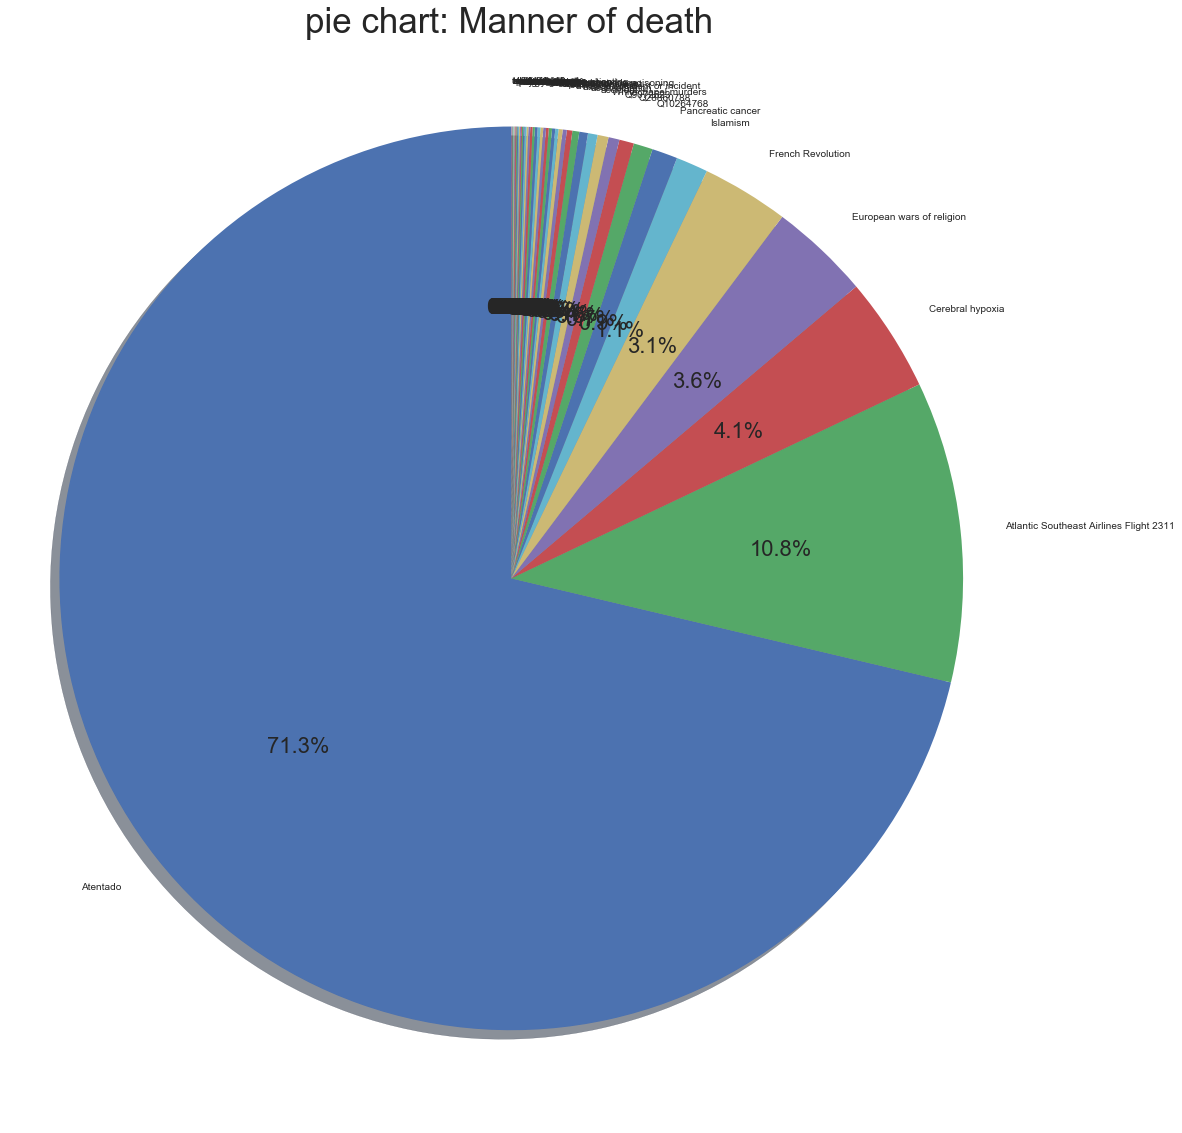

In [323]:
plt.rcParams['figure.figsize'] = (18,20)
plt.rcParams.update({'font.size':22})
# plt.figure(figsize=(23,44))
plt.pie(y, labels=x, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("pie chart: Manner of death", size=35)
plt.show()